### Import the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
spam = pd.read_csv('C:\\Users\\Neha\\Desktop\\New folder\\Spam_Detection\\email_data.csv')
spam.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Check the shape of the dataset

In [5]:
spam.shape

(5572, 2)

### Check the columns present in the dataset

In [8]:
spam.columns

Index(['Label', 'EmailText'], dtype='object')

### Check the descriptive statistics of the dataset

In [9]:
spam.describe()

,Label,EmailText
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


### Check the info of the dataset

In [15]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
spam["Label"].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

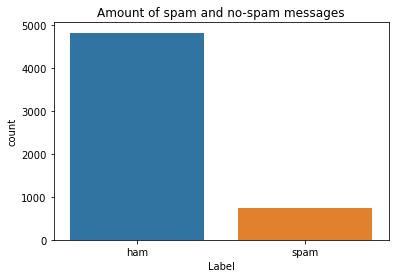

In [16]:
sns.countplot(data = spam, x= spam["Label"]).set_title("Amount of spam and no-spam messages")
plt.show()

### Plotting Pie-Chart

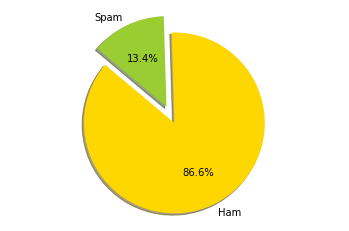

In [18]:
count_Class=pd.value_counts(spam.Label, sort= True)

# Data to plot

labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['gold', 'yellowgreen'] # 'lightcoral', 'lightskyblue'
explode = (0.1, 0.1)  # explode 1st slice
 
# Plot

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Extract the independent variables to create a dataframe X

In [19]:
X = spam["EmailText"]
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: EmailText, dtype: object

### Extract the dependent variables to create a dataframe y

In [20]:
y = spam["Label"]
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Label, dtype: object

### Split X and y into train and test dataset with test_size = 0.20, random_state=0

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

### Check the shape of X and y of train dataset

In [22]:
print(X_train.shape)
print(y_train.shape)

(4457,)
(4457,)


### Check the shape of X and y of test dataset

In [23]:
print(X_test.shape)
print(y_test.shape)

(1115,)
(1115,)


### Applying various models of Machine Learning

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()  
trainCV = cv.fit_transform(X_train)
testCV = cv.transform(X_test)

In [25]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(trainCV,y_train)
pred_NB = naive_bayes.predict(testCV)

In [26]:
from sklearn.metrics import accuracy_score
Accuracy_Score_NB = accuracy_score(y_test, pred_NB)
Accuracy_Score_NB

0.9874439461883409

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(trainCV, y_train)
pred_knn = classifier_knn.predict(testCV)

In [28]:
Accuracy_Score_knn = accuracy_score(y_test, pred_knn)
Accuracy_Score_knn

0.9085201793721973

In [29]:
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(trainCV, y_train)
pred_svm_linear = classifier_svm_linear.predict(testCV)

In [30]:
Accuracy_Score_SVM_Linear = accuracy_score(y_test, pred_svm_linear)
Accuracy_Score_SVM_Linear

0.9811659192825112

In [31]:
classifier_svm_rbf = SVC(kernel = 'rbf')
classifier_svm_rbf.fit(trainCV, y_train)
pred_svm_rbf = classifier_svm_rbf.predict(testCV)

In [32]:
Accuracy_Score_SVM_Gaussion = accuracy_score(y_test, pred_svm_rbf)
Accuracy_Score_SVM_Gaussion

0.9766816143497757

In [33]:
classifier_svm_poly = SVC(kernel = 'poly')
classifier_svm_poly.fit(trainCV, y_train)
pred_svm_poly = classifier_svm_poly.predict(testCV)

In [34]:
Accuracy_Score_SVM_Polynomial = accuracy_score(y_test, pred_svm_poly)
Accuracy_Score_SVM_Polynomial

0.9417040358744395

In [35]:
classifier_svm_sigmoid = SVC(kernel = 'sigmoid')
classifier_svm_sigmoid.fit(trainCV, y_train)
pred_svm_sigmoid = classifier_svm_sigmoid.predict(testCV)

In [36]:
Accuracy_Score_svm_Sigmoid = accuracy_score(y_test, pred_svm_sigmoid)
Accuracy_Score_svm_Sigmoid

0.9300448430493273

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(trainCV, y_train)
pred_dt = classifier_dt.predict(testCV)

In [38]:
Accuracy_Score_dt = accuracy_score(y_test, pred_dt)
Accuracy_Score_dt

0.9614349775784753

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(trainCV, y_train)
pred_rf = classifier_rf.predict(testCV)

In [40]:
Accuracy_Score_rf = accuracy_score(y_test, pred_rf)
Accuracy_Score_rf

0.9695067264573991

In [41]:
print("K-Nearest Neighbors =",Accuracy_Score_knn)
print("Naive Bayes =",Accuracy_Score_NB)
print("Support Vector Machine Linear =",Accuracy_Score_SVM_Linear)
print("Support Vector Machine Gaussion =",Accuracy_Score_SVM_Gaussion)
print("Support Vector Machine Polynomial =",Accuracy_Score_SVM_Polynomial)
print("Support Vector Machine Sigmoid =",Accuracy_Score_svm_Sigmoid)
print("Decision Tree =",Accuracy_Score_dt)
print("Random Forest =",Accuracy_Score_rf)

K-Nearest Neighbors = 0.9085201793721973
Naive Bayes = 0.9874439461883409
Support Vector Machine Linear = 0.9811659192825112
Support Vector Machine Gaussion = 0.9766816143497757
Support Vector Machine Polynomial = 0.9417040358744395
Support Vector Machine Sigmoid = 0.9300448430493273
Decision Tree = 0.9614349775784753
Random Forest = 0.9695067264573991
